In [1]:
import qutip as q
import numpy as np
import subprocess
import ffmpeg
import pickle
import os
import re

%matplotlib inline
from matplotlib import rc
from matplotlib import pyplot as plt
font = {'weight' : 'normal',
        'size'   : 18}
rc('font', **font)

from matplotlib.font_manager import FontProperties

In [23]:
#Frequency
Omega = 1
Omega *= 2 * np.pi

# NV hamiltonian
sx = q.spin_Jx(1)
sy = q.spin_Jy(1)
sz = q.spin_Jz(1)

#time list
time_x=1
t = np.linspace(0, time_x, 10000)

#initial state
a = 90
phi =np.cos(np.deg2rad(a)/2)*q.basis(3,1) + np.sin(np.deg2rad(a)/2)* q.basis(3,0) 

rho_nv = phi*phi.dag()
rho_nv


Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.5 0.5 0. ]
 [0.5 0.5 0. ]
 [0.  0.  0. ]]

In [24]:
#resonance frequency D \pm ws
ws = 0.01e3
D = 2.86e3

def get_Hdc():
    Hdc = ws * sx * np.sqrt(2)/2.0 * np.pi
    return Hdc
get_Hdc()



Hdc = get_Hdc()
Hdc

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 0.         15.70796327  0.        ]
 [15.70796327  0.         15.70796327]
 [ 0.         15.70796327  0.        ]]

0.00010001000100010001


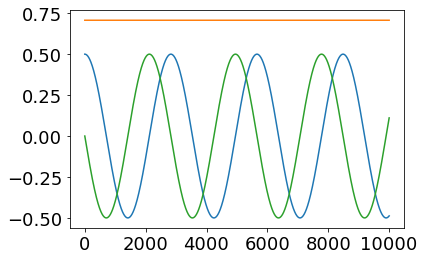

Text(0, 0.5, 'FFT(<Sy>)')

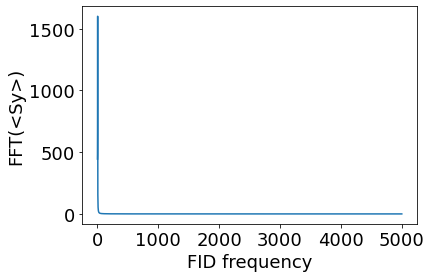

In [30]:
resultat = []
resultat.append(q.mesolve(H=Hdc, rho0=rho_nv, tlist=t, c_ops = [], e_ops=[], options=q.Options(nsteps=100000)))

dt = t[1]-t[0]
print(dt)
freq_axis = np.fft.rfftfreq(t.size, dt)
data = q.expect(resultat[0].states, sz)

plt.plot(data)
data = q.expect(resultat[0].states, sx)

plt.plot(data)
data = q.expect(resultat[0].states, sy)

plt.plot(data)
plt.show()

#plot Fourier of the FID
plt.plot(freq_axis,np.abs(np.fft.rfft(data)))
plt.xlabel('FID frequency')
plt.ylabel('FFT(<Sy>)')

In [32]:
##http://qutip.org/docs/4.3/guide/dynamics/dynamics-monte.html

10.0%. Run time:   3.34s. Est. time left: 00:00:00:30
20.0%. Run time:   3.87s. Est. time left: 00:00:00:15
30.0%. Run time:   4.40s. Est. time left: 00:00:00:10
40.0%. Run time:   4.92s. Est. time left: 00:00:00:07
50.0%. Run time:   5.48s. Est. time left: 00:00:00:05
60.0%. Run time:   5.99s. Est. time left: 00:00:00:03
70.0%. Run time:   6.52s. Est. time left: 00:00:00:02
80.0%. Run time:   7.03s. Est. time left: 00:00:00:01
90.0%. Run time:   7.60s. Est. time left: 00:00:00:00
100.0%. Run time:   8.12s. Est. time left: 00:00:00:00
Total run time:   8.15s


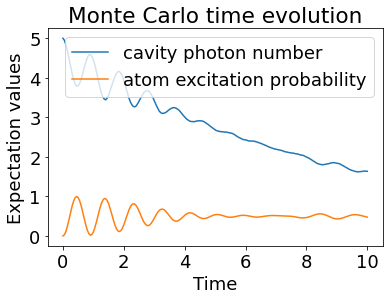

Quantum object: dims = [[2, 10], [1, 1]], shape = (20, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [38]:
times = np.linspace(0.0, 10.0, 200)
psi0 = q.tensor(q.fock(2, 0), q.fock(10, 5))
#5 photons, 1 atom

a  = q.tensor(q.qeye(2), q.destroy(10))

sm = q.tensor(q.destroy(2), q.qeye(10))

H = 2 * np.pi * a.dag() * a + 2 * np.pi * sm.dag() * sm + 2 * np.pi * 0.25 * (sm * a.dag() + sm.dag() * a)

data = q.mcsolve(H, psi0, times, [np.sqrt(0.1) * a], [a.dag() * a, sm.dag() * sm])
plt.plot(times, data.expect[0], times, data.expect[1])

plt.title('Monte Carlo time evolution')

plt.xlabel('Time')
plt.ylabel('Expectation values')
plt.legend(("cavity photon number", "atom excitation probability"))
plt.show()


In [171]:
times = np.linspace(0.0, 20.0, 200)
psi0 = q.tensor((q.fock(3, 1)+q.fock(3, 1))/np.sqrt(4), (q.fock(2, 0) +q.fock(2, 1))/np.sqrt(2) )
#5 photons, 1 atom
print(psi0)
Omega = 1
Omega *= 2 * np.pi

# NV hamiltonian
sx = q.spin_Jx(1)
sy = q.spin_Jy(1)
sz = q.spin_Jz(1)

ix = q.spin_Jx(0.5)
iy = q.spin_Jy(0.5)
iz = q.spin_Jz(0.5)



Sx = q.tensor(sx, q.qeye(2))
Sy = q.tensor(sy, q.qeye(2))
Sz = q.tensor(sz, q.qeye(2))

Ix = q.tensor(q.qeye(3), ix)
Iy = q.tensor(q.qeye(3), iy)
Iz = q.tensor(q.qeye(3), iz)


subx1 = q.Qobj(np.asarray([[0,1,0],[1,0,0],[0,0,0]]))
subx2 = q.Qobj(np.asarray([[0,0,0],[0,0,1],[0,1,0]]))

xx1 = q.tensor(subx1, q.qeye(2))
xx2 = q.tensor(subx2, q.qeye(2))

#print(subx1 + subx2)


#a  = q.tensor(q.qeye(3),q.qeye(2))
ap = q.tensor(q.spin_Jp(1), q.qeye(2))
am = q.tensor(q.spin_Jm(1), q.qeye(2))
#
#print(av)
v1 = q.Qobj(np.asarray([[0,0,1],[0,0,0],[0,0,0]]))
v2 = q.Qobj(np.asarray([[0,1,0],[0,0,0],[0,0,0]]))
v3 = q.Qobj(np.asarray([[0,0,0],[0,0,1],[0,0,0]]))
v4 = q.Qobj(np.asarray([[0,0,0],[1,0,0],[0,0,0]]))
v5 = q.Qobj(np.asarray([[0,0,0],[0,0,0],[0,1,0]]))
v6 = q.Qobj(np.asarray([[0,0,0],[0,0,0],[1,0,0]]))

vall = [v1,v2,v3,v4,v5,v6]
print(v)

av = q.tensor(verboten, q.qeye(2))

decay_array = []
prob = 0.6e-1

for v in vall:
    vnew=q.tensor(v, q.qeye(2))
    decay_array.append(np.sqrt(prob) * vnew)

#inhomogenious driving
a = 40
b = 30
H =  2 * np.pi * 0 * Sx + 5 * np.pi * Sz * Iz + 40 * np.pi * 2 * Iz + a * 2 * np.pi * xx1 + b * 2 * np.pi * xx2

#print(decay_array)


data = q.mcsolve(H, psi0, times, decay_array, [Ix, Sx])

Quantum object: dims = [[3, 2], [1, 1]], shape = (6, 1), type = ket
Qobj data =
[[0.        ]
 [0.        ]
 [0.70710678]
 [0.70710678]
 [0.        ]
 [0.        ]]
Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
10.0%. Run time:  16.92s. Est. time left: 00:00:02:32
20.0%. Run time:  30.77s. Est. time left: 00:00:02:03
30.0%. Run time:  44.53s. Est. time left: 00:00:01:43
40.0%. Run time:  58.58s. Est. time left: 00:00:01:27
50.0%. Run time:  72.42s. Est. time left: 00:00:01:12
60.0%. Run time:  86.57s. Est. time left: 00:00:00:57
70.0%. Run time: 100.72s. Est. time left: 00:00:00:43
80.0%. Run time: 115.02s. Est. time left: 00:00:00:28
90.0%. Run time: 129.51s. Est. time left: 00:00:00:14
100.0%. Run time: 143.71s. Est. time left: 00:00:00:00
Total run time: 143.74s


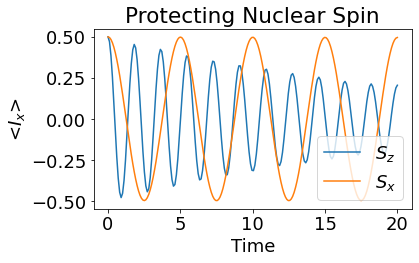

In [172]:
plt.plot(times, data.expect[0])#, times, data.expect[1])
plt.plot(ctimes,data1)#,ctimes,data2)
#plt.yscale('log')
plt.title('Protecting Nuclear Spin')

plt.xlabel('Time')
plt.ylabel('<$I_x$>')
plt.legend(("$S_z$", "$S_x$"),loc=4)
plt.tight_layout()
#plt.savefig('protection-first.png',dpi=150)
plt.show()
 

In [144]:
from copy import copy
ctimes = copy(times)
data1 = copy(data.expect[0])
data2 = copy(data.expect[1])



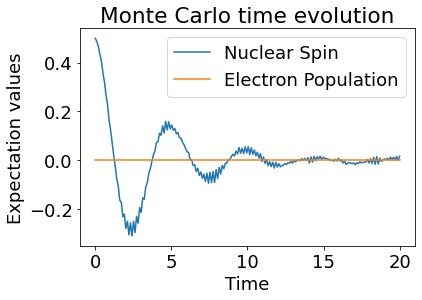

In [99]:
plt.plot(times, data.expect[0], times, data.expect[1])
#plt.yscale('log')
plt.title('Monte Carlo time evolution')

plt.xlabel('Time')
plt.ylabel('Expectation values')
plt.legend(("Nuclear Spin", "Electron Population"))
plt.show()

In [ ]:

a  = q.tensor(q.qeye(2), q.destroy(10))

sm = q.tensor(q.destroy(2), q.qeye(10))

H = 2 * np.pi * a.dag() * a + 2 * np.pi * sm.dag() * sm + 2 * np.pi * 0.25 * (sm * a.dag() + sm.dag() * a)

data = q.mcsolve(H, psi0, times, [np.sqrt(0.1) * a], [a.dag() * a, sm.dag() * sm])
plt.plot(times, data.expect[0], times, data.expect[1])

plt.title('Monte Carlo time evolution')

plt.xlabel('Time')
plt.ylabel('Expectation values')
plt.legend(("cavity photon number", "atom excitation probability"))
plt.show()

Our final goal is to solve understand to solve this Hamiltonian for double quantum sensing

$H = D S_z^2 + \frac{\omega_0}{2}  \,S_z + \frac{\Omega_{rf}}{2}  \,cos(\omega_{rf}t) S_z  + \Omega_1 \, \cos(\omega_1 t) \, \sigma_x$

where $\omega_0$ is the magnetic field $\omega_0 = \gamma B$, $D$ is the zero field splitting, $\Omega_{rf}$ 
is the strength and $\omega_{rf}$ is the frequency of the strong longitudinal RF field, finally we have the 
control field $\Omega_1$ given the transitions between energy levels.

Firat we define the operators and verify all variables with FID/rabi oscillations

In [5]:
#Frequency
Omega = 1
Omega *= 2 * np.pi

# NV hamiltonian
sx = q.spin_Jx(1)
sy = q.spin_Jy(1)
sz = q.spin_Jz(1)





#time list
time_x=1
t = np.linspace(0, time_x, 10000)

#initial state
a = 90
phi =np.cos(np.deg2rad(a)/2)*q.basis(3,1) + np.sin(np.deg2rad(a)/2)* q.basis(3,2) 

rho_nv = phi*phi.dag()
rho_nv


Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.  0.  0. ]
 [0.  0.5 0.5]
 [0.  0.5 0.5]]

In [55]:
#resonance frequency D \pm ws
ws = 0.01e3
D = 2.86e3

def get_Hdc():
    Hdc = ws * sz * 2 * np.pi+ D*(sz**2) * 2 * np.pi
    return Hdc
get_Hdc()



Hdc = get_Hdc()

0.00010001000100010001


Text(0, 0.5, 'FFT(<Sy>)')

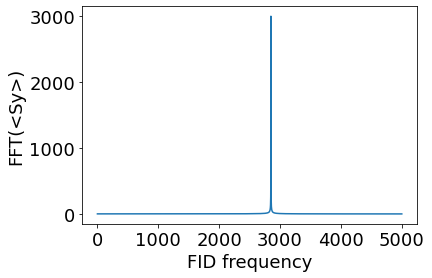

In [7]:
resultat = []
resultat.append(q.mesolve(H=Hdc, rho0=rho_nv, tlist=t, c_ops = [], e_ops=[], options=q.Options(nsteps=100000)))

dt = t[1]-t[0]
print(dt)
freq_axis = np.fft.rfftfreq(t.size, dt)
data = q.expect(resultat[0].states, sx)

#plot Fourier of the FID
plt.plot(freq_axis,np.abs(np.fft.rfft(data)))
plt.xlabel('FID frequency')
plt.ylabel('FFT(<Sy>)')

## Time dependant Hamiltonian

### First only Probe and 3LS - no Floquet

In [8]:
Omega = 1 #MHz
Omegarf = 0.04

#time independant
Hdc = get_Hdc() #MHz

#time dependant
H1 = Omega * sx * 2 * np.pi


Hrf = Omegarf * sz

#time dependant functions
def Hx1_coeff(t,args):
    freq = args['freq1']
    return np.sin(2 * np.pi *freq * t)



def Hxprobe_coeff(t,args):
    freq = args['freqp'] 
    phase = args['phasep']
    return np.sin(2 * np.pi *freq * t + phase)


#Overall Hamiltonian
H = [Hdc,[H1,Hxprobe_coeff]] #[Hrf,Hx1_coeff],
H

[Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
 Qobj data =
 [[18032.74183161     0.             0.        ]
  [    0.             0.             0.        ]
  [    0.             0.         17907.07812546]],
 [Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
  Qobj data =
  [[0.         4.44288294 0.        ]
   [4.44288294 0.         4.44288294]
   [0.         4.44288294 0.        ]],
  <function __main__.Hxprobe_coeff(t, args)>]]

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


<ipython-input-9-bbbd4ff504c9>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm(range(length)):


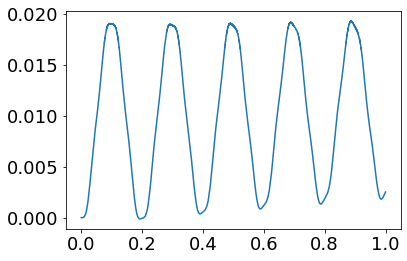

In [9]:
#initial state
phi = q.basis(3,1)
rho_nv = phi*phi.dag()
print(rho_nv)

startf = -15
stopf = 15

odmr_frq = []
odmr = []
length=5
wrf = 1
phase = 0

freqs  = np.linspace(startf,stopf,length)
from tqdm import tqdm_notebook as tqdm

for k in tqdm(range(length)):
    wodmr = freqs[k] + 2860
    odmr_frq.append(wodmr)
    output = q.mesolve(H=H, rho0=rho_nv, tlist=t, c_ops = [], e_ops=[], 
                       options=q.Options(nsteps=100000), args={'freqp': wodmr, 'phasep': phase,
                                                              'ampp':1,'amp1':1})
    odmr.append(q.expect(output.states, sz)[-1])
    
plt.plot(t,q.expect(output.states, sz))

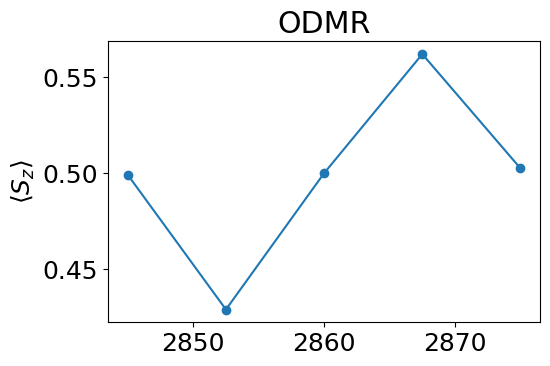

In [10]:
plt.figure(dpi = 100)

plt.title('ODMR')
plt.plot(odmr_frq,np.asarray(odmr)+0.5,marker = 'o', linestyle = '-')

plt.ylabel('$\\langle S_z \\rangle$')

plt.tight_layout()
plt.savefig('pure-odmr.png')

## ODMR with Floquet

In [56]:
Omega = 2 #MHz
Omegarf = 10 * 2 * np.pi

#time independant
Hdc = get_Hdc() #MHz

#time dependant
H1 = Omega * sx * 2 * np.pi
Hrf = Omegarf * sz

#time dependant functions
def Hx1_coeff(t,args):
    freq = args['freq1']
    amp = args['amp1']
    return amp * np.sin(2 * np.pi *freq * t)



def Hxprobe_coeff(t,args):
    freq = args['freqp'] 
    phase = args['phasep']
    amp = args['ampp']
    return amp *  np.sin(2 * np.pi *freq * t + phase)


#Overall Hamiltonian
H = [Hdc,[H1,Hxprobe_coeff],[Hrf,Hx1_coeff],] #[Hrf,Hx1_coeff],

In [29]:
#initial state
phi = q.basis(3,1)
rho_nv = phi*phi.dag()
print(rho_nv)

startf = -35
stopf = 35

odmr_frq = []
odmr = []
length=100
wrf = 10
phase = 0

dq = []

#time list
time_x=0.5 * 0.5
t = np.linspace(0, time_x, 2500)



freqs  = np.linspace(startf,stopf,length)

from tqdm import tqdm_notebook as tqdm

for k in tqdm(range(length)):
    wodmr = freqs[k] + 2860
    odmr_frq.append(wodmr)
    output = q.mesolve(H=H, rho0=rho_nv, tlist=t, c_ops = [], e_ops=[], 
                       options=q.Options(nsteps=100000), args={'freqp': wodmr, 'phasep': phase, 'freq1':wrf,
                                                              'ampp':1,'amp1':1})
    odmr.append(q.expect(output.states, sz)[-1])
    dq.append(q.expect(output.states, sz**2)[-1])
plt.plot(t,q.expect(output.states, sz))

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


<ipython-input-29-065f84709ce1>:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm(range(length)):


KeyboardInterrupt: 

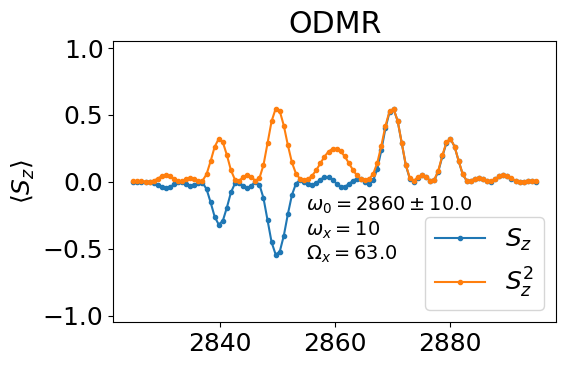

In [20]:
plt.figure(dpi = 100)

plt.title('ODMR')
plt.plot(odmr_frq,np.asarray(odmr),marker = '.', linestyle = '-',label='$S_z$')
plt.plot(odmr_frq,np.asarray(dq),marker = '.', linestyle = '-',label='$S_z^2$')
plt.legend(loc=4)
plt.ylabel('$\\langle S_z \\rangle$')

comment = f'$\\omega_0 = 2860 \\pm {ws} $'
comment += '\n'
comment += f'$\\omega_x = {wrf}$'
comment += '\n'
comment += f'$\\Omega_x = {np.round(Omegarf)}$'


plt.text(2855, -0.1, comment, fontsize=14,
        verticalalignment='top')
plt.ylim([-1.05,1.05])

plt.tight_layout()
plt.savefig('odmr-triplet-x.png')

## Make an experiment

While in the above we made only a ODMR we want to consider now want to study the evolution after preparing the dq-state

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
0


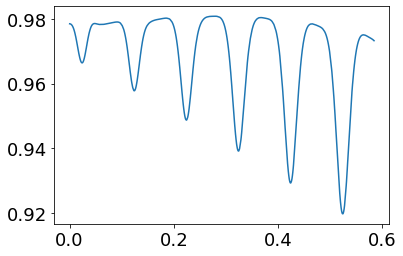

In [93]:
#initial state
phi = q.basis(3,1)
rho_nv = phi*phi.dag()
print(rho_nv)

startf = -35
stopf = 35

length=10
wrf = 10
phase = 0

dq = []

#time list



freqs  = np.linspace(startf,stopf,length)

from tqdm import tqdm_notebook as tqdm


tau_list = []
states_final = []


time_x=0.58470116
steps = int(1e5)

t = np.linspace(0, time_x, steps)

wodmr = 2860

show_full = True

#pi pulse
output = q.mesolve(H=H, rho0=rho_nv, tlist=t, c_ops = [], e_ops=[], 
                   options=q.Options(nsteps=100000), args={'freqp': wodmr, 'phasep': phase, 'freq1':wrf,
                                                           'ampp':1,'amp1':1})

prepped_state = output 
#FID 

if show_full:
    states_final.append(output.states)
    tau_sweep = [1]
else:
    tau_sweep = np.linspace(1.0,1.15,30)

#tau sweep
for k, dtau in enumerate(tau_sweep):
    print(k)
    output = q.mesolve(H=H, rho0=prepped_state.states[-1], tlist=t*dtau, c_ops = [], e_ops=[], 
                   options=q.Options(nsteps=100000), args={'freqp': wodmr, 'ampp':0,
                                                    'phasep': phase, 'freq1':wrf,'amp1':0})
    if show_full:
        states_final.append(output.states)
    #pi pulse
    output = q.mesolve(H=H, rho0=output.states[-1], tlist=t, c_ops = [], e_ops=[], 
                   options=q.Options(nsteps=100000), args={'freqp': wodmr, 'phasep': phase, 'freq1':wrf,
                                                           'ampp':1,'amp1':1})
    
    if show_full:
        states_final.append(output.states)
    else:
        states_final.append(output.states[-1])

tau_list.append(time_x)
plt.plot(t,q.expect(output.states, sz**2))

5.8470700707007075e-06
5.8470700707007075e-06
5.8470700707007075e-06


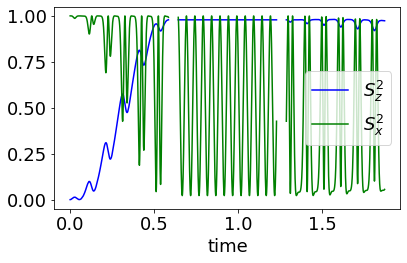

In [107]:
if show_full:
    for k,state in enumerate(states_final):
        dt = t[1]-t[0]
        print(dt)
        freq_axis = np.fft.rfftfreq(t.size, dt)
        if k==0:
            data = q.expect(state, sz**2)
            plt.plot(t + k *1.1* time_x,data,'b',label='$S_z^2$')
            data = q.expect(state, sx**2)
            plt.plot(t + k *1.1* time_x,data,'g',label='$S_x^2$')
        elif k==1:
            data = q.expect(state, sz**2)
            plt.plot(t + k*1.1 * time_x,data,'b')
            data = q.expect(state, sx**2)
            plt.plot(t + k *1.1* time_x,data,'g')
        else:
            data = q.expect(state, sz**2)
            plt.plot(t + k *1.1* time_x,data,'b')
            data = q.expect(state, sx**2)
            plt.plot(t + k*1.1 * time_x,data,'g')
        plt.xlabel('time')
        plt.tight_layout()
        plt.legend()
        plt.savefig('ramsey-full-evolution',dpi=150)
else:
    for k,state in enumerate(states_final):
        plt.plot(tau_sweep[k],q.expect(state,sz**2),'ro')
        plt.xlabel('FID tau')
        plt.ylabel('<$S_z$>')
        plt.tight_layout()
        plt.title('ramsey')
        plt.savefig('ramsey-response',dpi=150)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.5 0.  0.5]
 [0.  1.  0. ]
 [0.5 0.  0.5]]